In [1]:
#!/usr/bin/python
import cv2
import os
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
IMAGE_FILE = 'image.jpg' # image file
VIDEO_FILE = 'demo.mp4' # video file

# Create an ORB object and detect keypoints and descriptors in the template
orb = cv2.ORB_create()
# Create a brute-force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [3]:
def load_descriptors(file_name):
    fs = cv2.FileStorage(file_name, cv2.FILE_STORAGE_READ)
    descriptors = fs.getNode("descriptors").mat()
    keypoints = fs.getNode("keypoints").mat()
    fs.release()
    return keypoints, descriptors

In [73]:
def keypoints_from_image_file(image_file):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect keypoints and compute descriptors in the frame
    kpts, des = orb.detectAndCompute(gray, None)
    return kpts, des, img

In [ ]:
#Plot the keypoints 
def plot_keypoints(query, train):
    #Keypoints of the obtained image
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    for x, y in query: plt.plot(x, y, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.title("Retrived image")
    
    #Keypoints of the reference image
    plt.subplot(1, 2, 2) # row 1, col 2 index 2
    for x, y in train: plt.plot(x, y, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.title("Reference image")
    
    plt.show()

In [118]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, 
                      height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    ax.plot(mean_x, mean_y, 'r.')
    transf = transforms.Affine2D() \
        .rotate_deg(0) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [119]:
#Plot the keypoints and analysis
def plot_keypoints_analysis(query, train):
    
    #Keypoints of the obtained image
    qx = np.array([x for (x, y) in query])
    qy = np.array([y for (x, y) in query])
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(qx, qy, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    confidence_ellipse(qx, qy, ax, edgecolor='red')
    plt.title("Retrived image")
    
    #Keypoints of the reference image
    tx = np.array([x for (x, y) in train])
    ty = np.array([y for (x, y) in train])
    plt.subplot(1, 2, 2) # row 1, col 2 index 2
    plt.plot(tx, ty, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    confidence_ellipse(tx, ty, ax, edgecolor='red')
    plt.title("Reference image")
    
    plt.show()

Compared with interval 1
Keypoint matches: 106


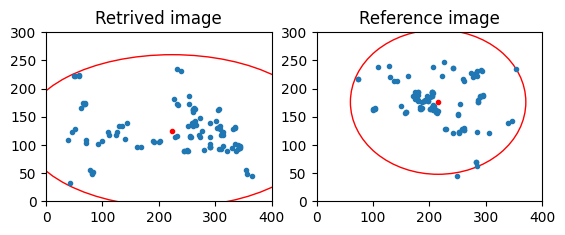

Compared with interval 2
Keypoint matches: 98


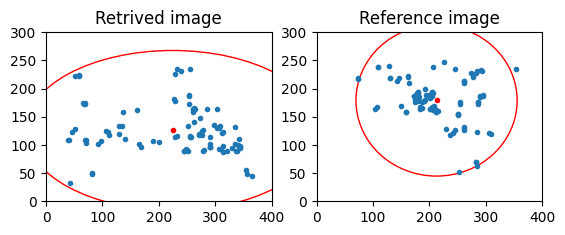

Compared with interval 3
Keypoint matches: 114


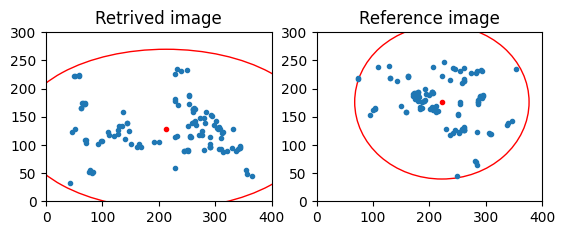

Compared with interval 4
Keypoint matches: 103


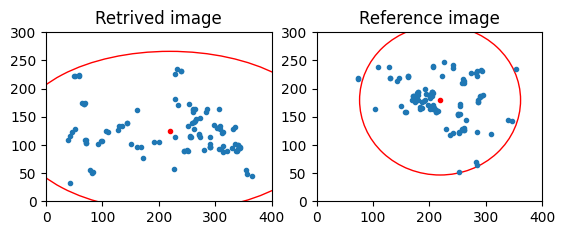

Compared with interval 5
Keypoint matches: 66


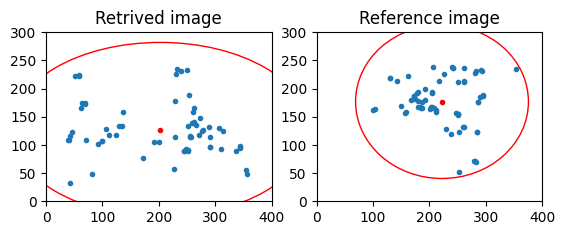

Compared with interval 6
Keypoint matches: 27


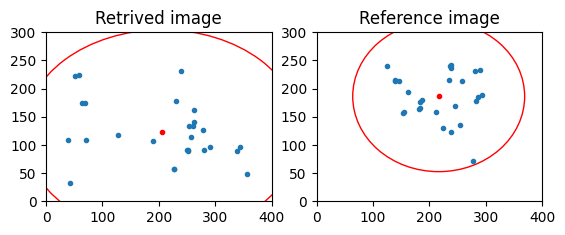

Compared with interval 7
Keypoint matches: 19


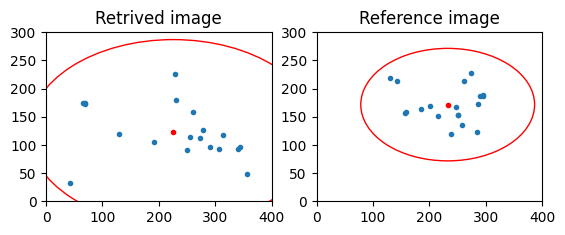

Compared with interval 8
Keypoint matches: 23


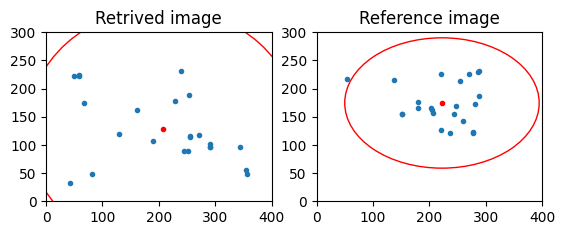

Compared with interval 9
Keypoint matches: 27


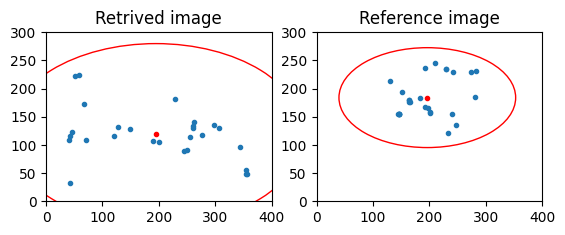

Compared with interval 10
Keypoint matches: 20


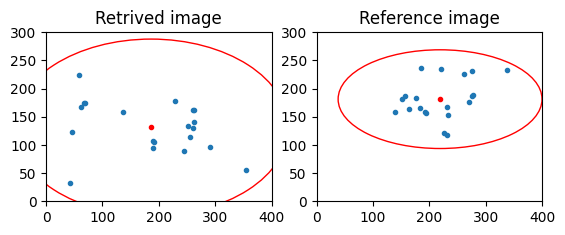

Compared with interval 11
Keypoint matches: 25


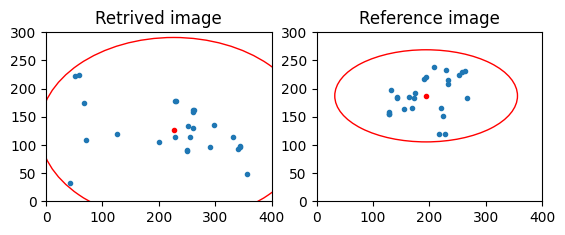

Compared with interval 12
Keypoint matches: 20


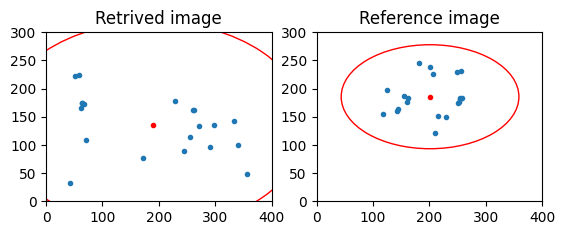

Compared with interval 13
Keypoint matches: 21


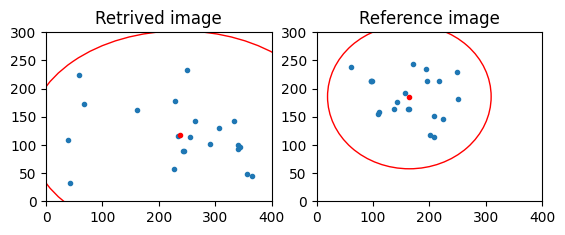

Compared with interval 14
Keypoint matches: 28


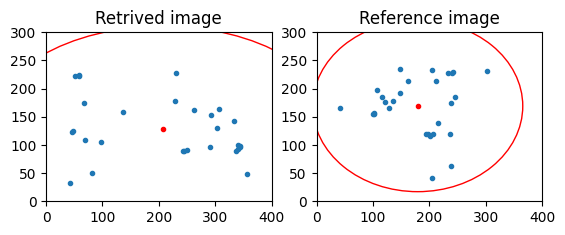

Compared with interval 15
Keypoint matches: 31


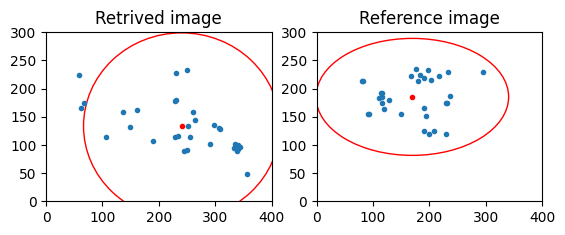

Compared with interval 16
Keypoint matches: 32


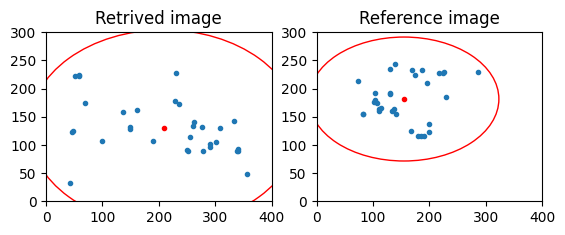

Compared with interval 17
Keypoint matches: 25


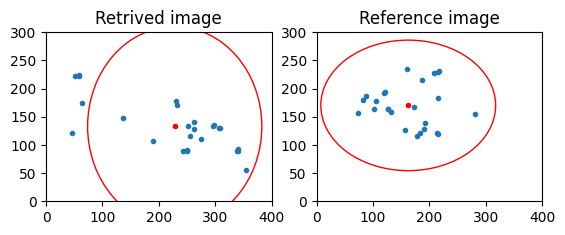

Compared with interval 18
Keypoint matches: 17


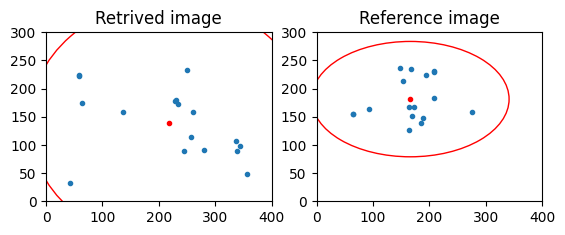

Compared with interval 19
Keypoint matches: 26


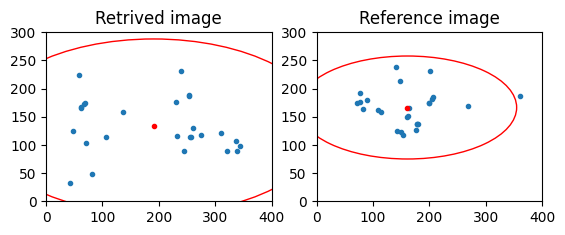

Compared with interval 20
Keypoint matches: 32


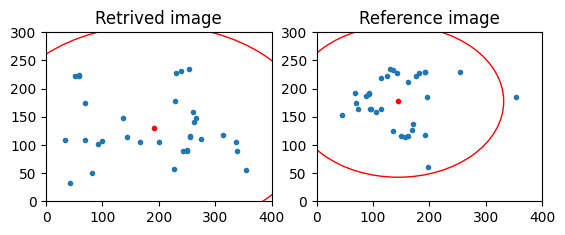

Compared with interval 21
Keypoint matches: 19


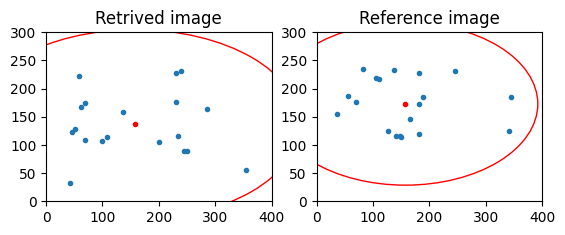

Compared with interval 22
Keypoint matches: 26


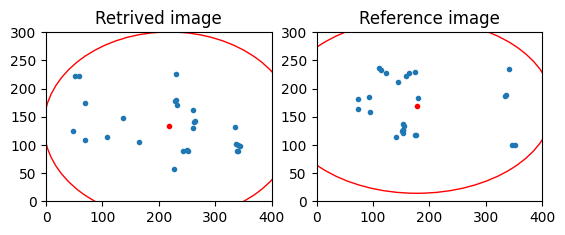

Compared with interval 23
Keypoint matches: 31


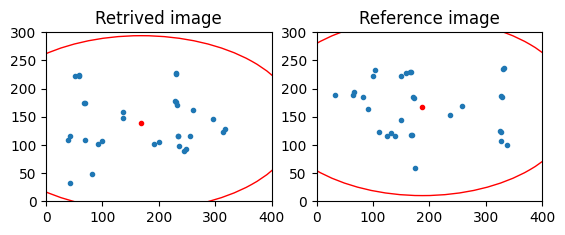

Compared with interval 24
Keypoint matches: 27


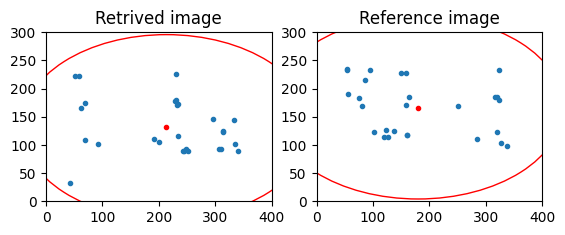

Compared with interval 25
Keypoint matches: 27


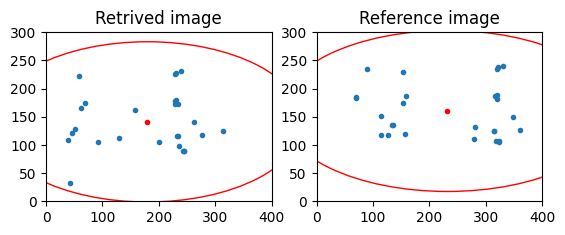

Compared with interval 26
Keypoint matches: 21


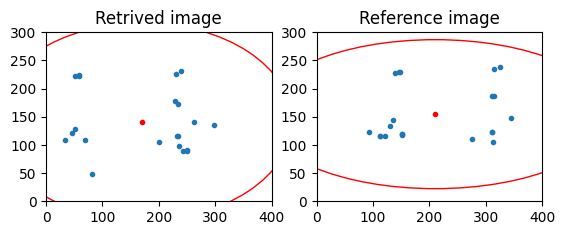

Compared with interval 27
Keypoint matches: 22


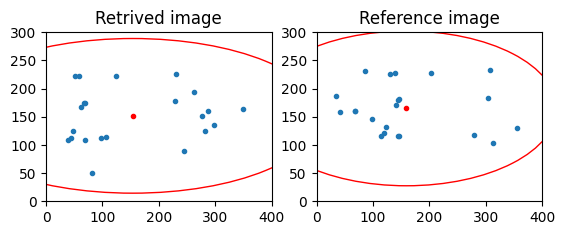

Compared with interval 28
Keypoint matches: 35


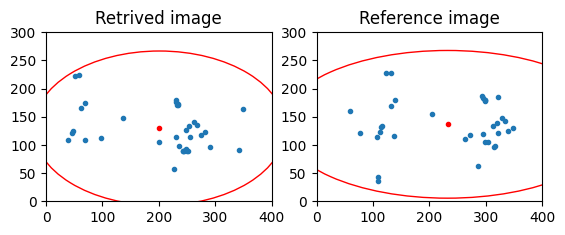

Compared with interval 29
Keypoint matches: 31


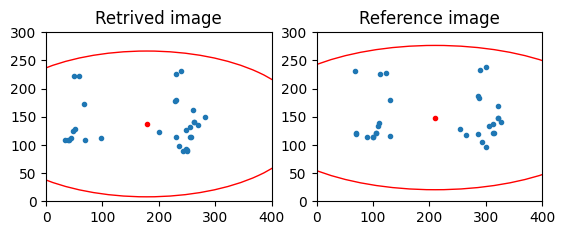

Compared with interval 30
Keypoint matches: 32


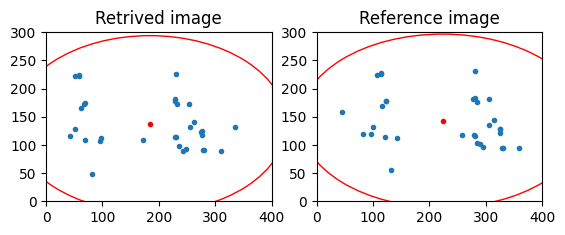

Compared with interval 31
Keypoint matches: 31


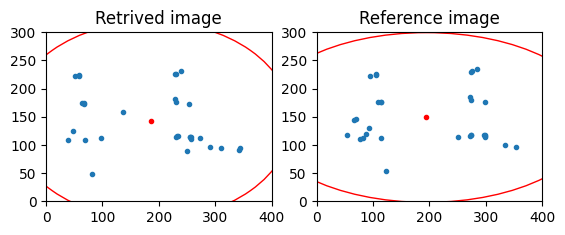

Compared with interval 32
Keypoint matches: 24


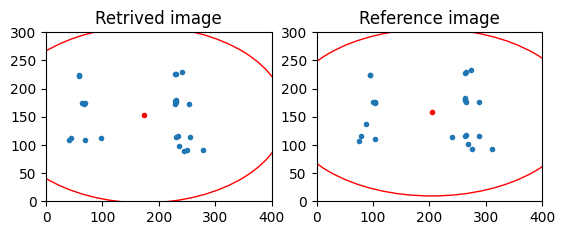

Compared with interval 33
Keypoint matches: 43


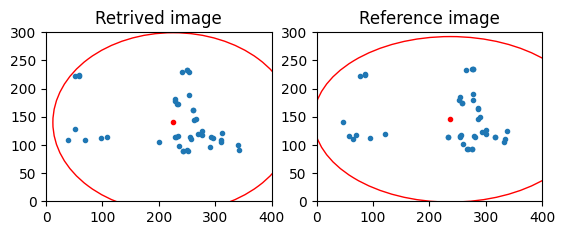

Compared with interval 34
Keypoint matches: 39


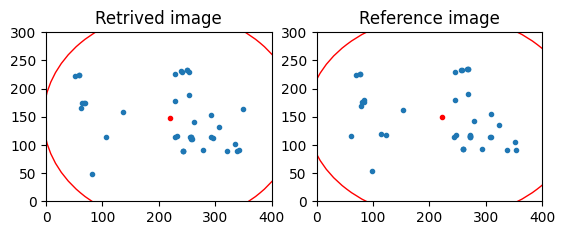

Compared with interval 35
Keypoint matches: 29


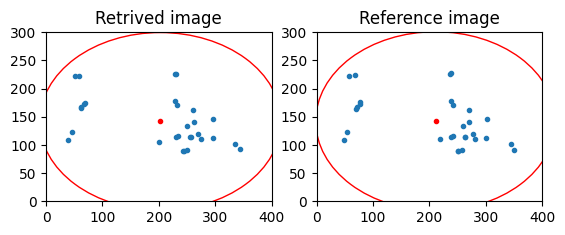

Compared with interval 36
Keypoint matches: 29


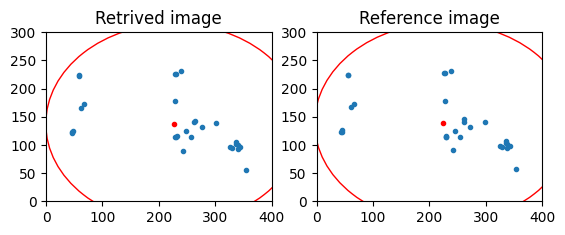

Compared with interval 37
Keypoint matches: 40


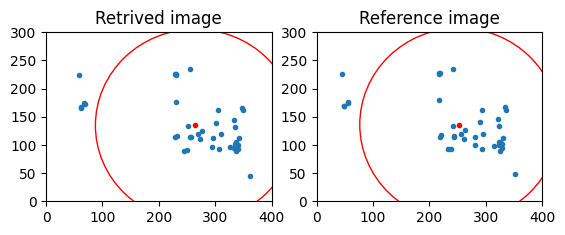

Compared with interval 38
Keypoint matches: 39


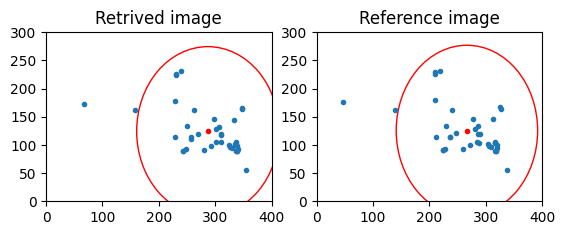

Compared with interval 39
Keypoint matches: 46


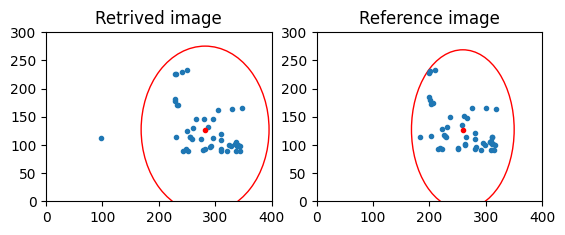

Compared with interval 40
Keypoint matches: 34


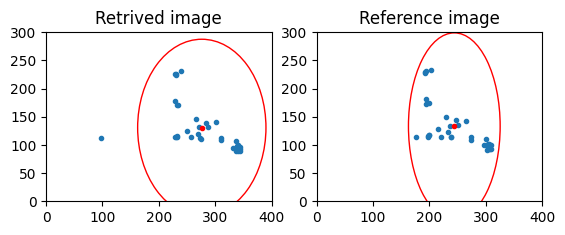

Compared with interval 41
Keypoint matches: 31


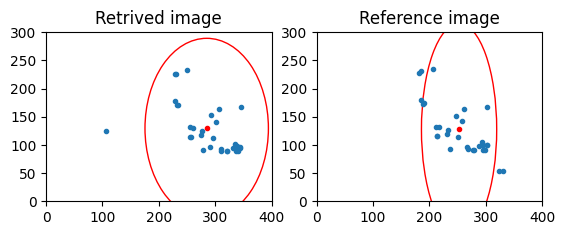

Compared with interval 42
Keypoint matches: 31


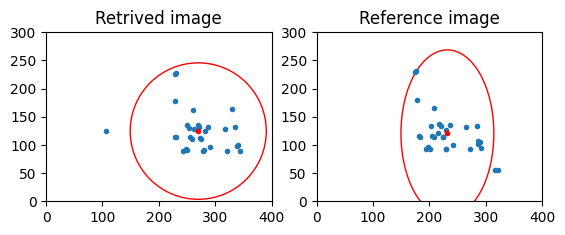

Compared with interval 43
Keypoint matches: 26


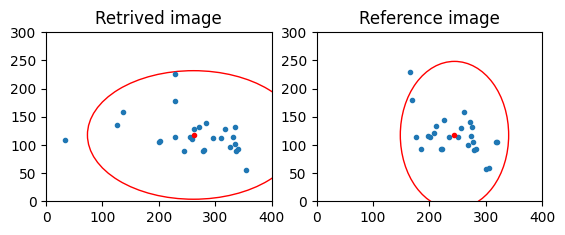

Compared with interval 44
Keypoint matches: 41


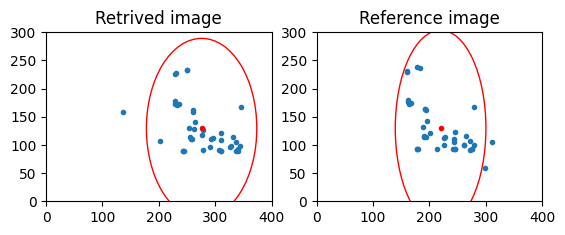

Compared with interval 45
Keypoint matches: 20


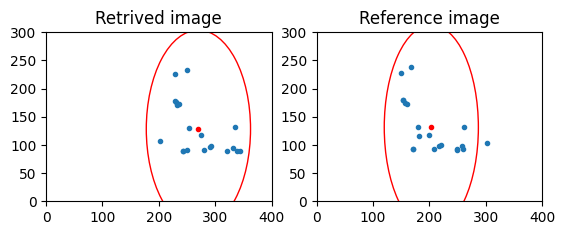

Compared with interval 46
Keypoint matches: 29


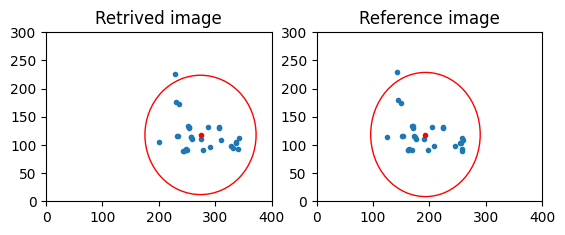

Compared with interval 47
Keypoint matches: 28


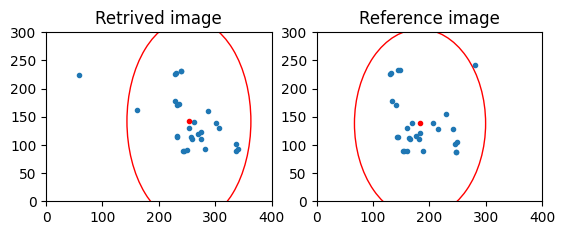

Compared with interval 48
Keypoint matches: 25


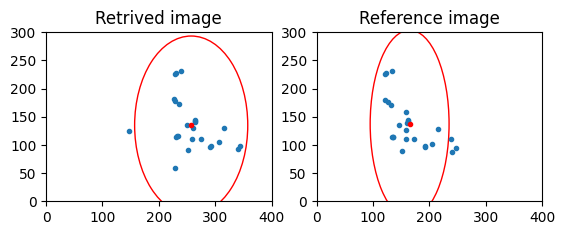

Compared with interval 49
Keypoint matches: 29


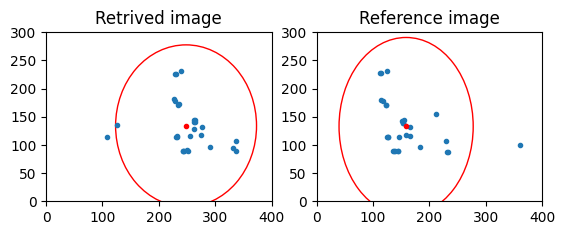

Compared with interval 50
Keypoint matches: 20


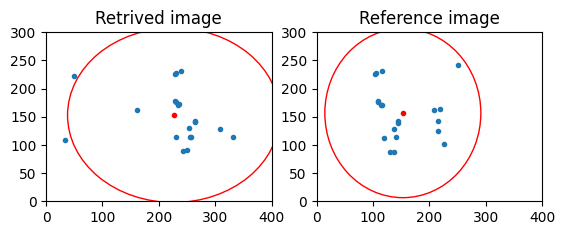

Compared with interval 51
Keypoint matches: 18


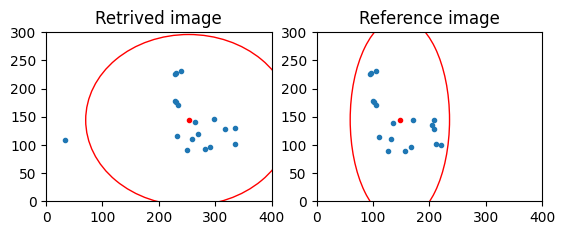

Compared with interval 52
Keypoint matches: 31


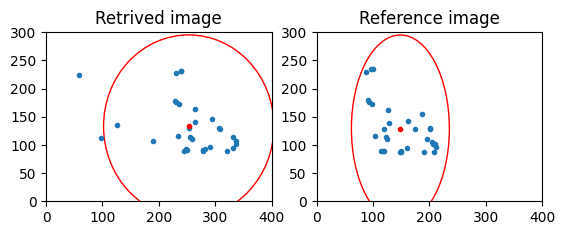

Compared with interval 53
Keypoint matches: 19


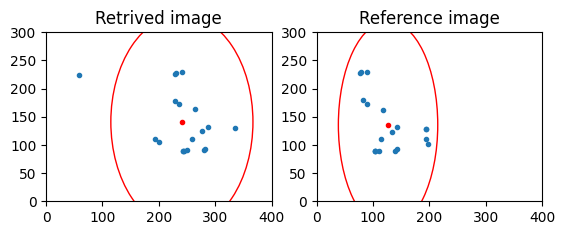

Compared with interval 54
Keypoint matches: 33


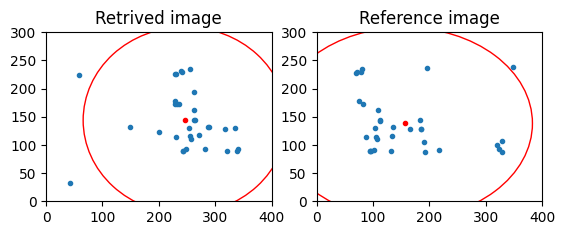

Compared with interval 55
Keypoint matches: 46


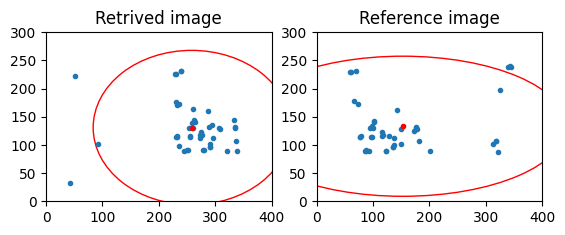

Compared with interval 56
Keypoint matches: 26


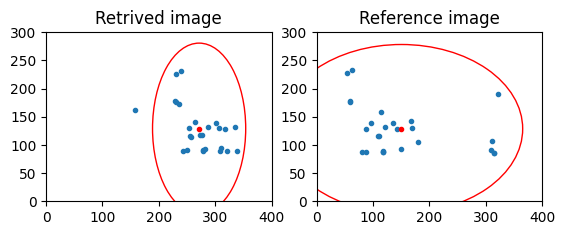

Compared with interval 57
Keypoint matches: 20


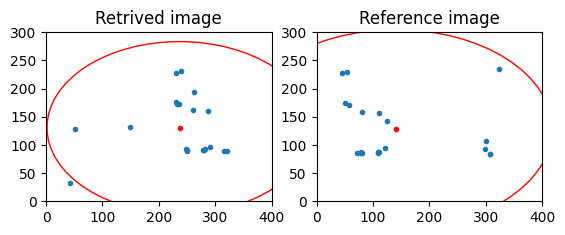

Compared with interval 58
Keypoint matches: 18


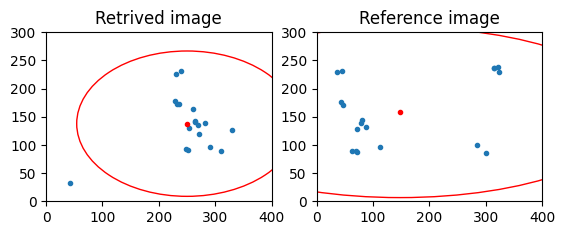

Compared with interval 59
Keypoint matches: 51


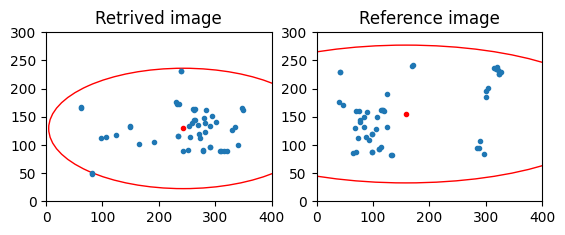

Compared with interval 60
Keypoint matches: 105


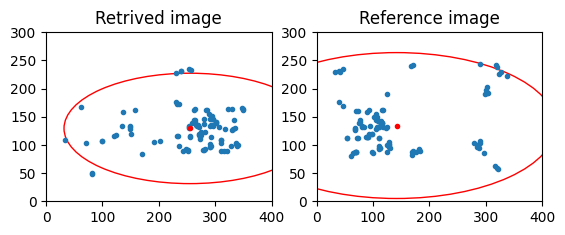

In [120]:
if __name__ == '__main__':
    # Load the ORB feature detector and descriptor from the image
    img_keypoints, img_descriptors, img = keypoints_from_image_file(IMAGE_FILE)
    # Determine the height and width of the image
    h, w, c = img.shape
    for i in range(len([entry for entry in os.listdir("demo_kpt_des")])):
#     for i in range(1):
        # load the  for i in range(descriptor for the interval
        ref_keypoints, ref_descriptors = load_descriptors("demo_kpt_des/demo_kpt_des" + str(i+1) + ".yml")
        # match the descriptors with the image
        matches = bf.match(img_descriptors, ref_descriptors)
        query_xy, train_xy = [], []
        print("Compared with interval " + str(i+1))
        print("Keypoint matches: " + str(len(matches)))
        for match in matches:
            img_idx = match.queryIdx
            interval_idx = match.trainIdx
            (x1, y1) = img_keypoints[img_idx].pt
            query_xy.append(np.array((x1, y1)))
            (x2, y2) = ref_keypoints[interval_idx]
            train_xy.append(np.array((x2, y2)))
#         plot_keypoints(query_xy, train_xy)
        plot_keypoints_analysis(query_xy, train_xy)